In [50]:
# Data processing
import numpy as np
import pandas as pd
pd.options.display.max_columns = None


# Graphing
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10, 8)


# Display all outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Load Data

In [51]:
train_values = pd.read_csv('data/train_values.csv', index_col='patient_id')
train_labels = pd.read_csv('data/train_labels.csv', index_col='patient_id')
data_train = train_values.join(train_labels)

data_test = pd.read_csv('data/test_values.csv', index_col='patient_id')

In [52]:
data_train.shape
data_train.head(10)

data_test.shape
data_test.head(10)

(180, 14)

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
patient_id,,,,,,,,,,,,,,
0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
ldukkw,1,normal,130,3,0,0,0,180,0.0,1,42,150,0,0
2gbyh9,2,reversible_defect,150,4,2,0,2,258,2.6,0,60,157,0,1
daa9kp,2,fixed_defect,150,4,1,0,2,276,0.6,1,57,112,1,1
3nwy2n,3,reversible_defect,170,4,0,0,2,326,3.4,1,59,140,1,1


(90, 13)

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
patient_id,,,,,,,,,,,,,
olalu7,2,reversible_defect,170,1,0,0,2,288,0.2,1,59,159,0
z9n6mx,1,normal,138,4,0,0,0,183,1.4,0,35,182,0
5k4413,2,reversible_defect,120,4,0,0,2,177,2.5,1,43,120,1
mrg7q5,1,normal,102,3,1,0,0,318,0.0,0,60,160,0
uki4do,2,normal,138,4,1,0,2,166,3.6,1,61,125,1
kev1sk,2,normal,122,3,0,0,0,213,0.2,0,43,165,0
9n6let,3,normal,150,1,0,0,0,226,2.6,0,66,114,0
jxmtyg,2,reversible_defect,140,3,3,0,2,254,2.0,1,69,146,0
51s2ff,1,normal,138,4,0,0,2,271,0.0,1,59,182,0


In [53]:
data_train.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


In [54]:
data_train.info()
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180 entries, 0z64un to 2nx10r
Data columns (total 14 columns):
slope_of_peak_exercise_st_segment       180 non-null int64
thal                                    180 non-null object
resting_blood_pressure                  180 non-null int64
chest_pain_type                         180 non-null int64
num_major_vessels                       180 non-null int64
fasting_blood_sugar_gt_120_mg_per_dl    180 non-null int64
resting_ekg_results                     180 non-null int64
serum_cholesterol_mg_per_dl             180 non-null int64
oldpeak_eq_st_depression                180 non-null float64
sex                                     180 non-null int64
age                                     180 non-null int64
max_heart_rate_achieved                 180 non-null int64
exercise_induced_angina                 180 non-null int64
heart_disease_present                   180 non-null int64
dtypes: float64(1), int64(12), object(1)
memory usage: 26.1+ KB

In [55]:
data_train.duplicated().value_counts()
data_test.duplicated().value_counts()

False    180
dtype: int64

False    90
dtype: int64

No missing values or duplicated values, so good so far

# EDA

## Univariate analysis

Let's go through each variable individually to view their distributions and their relationships with heart_disease_present if any

### Heart disease present (Target)

### Slope of peak exercise st segment

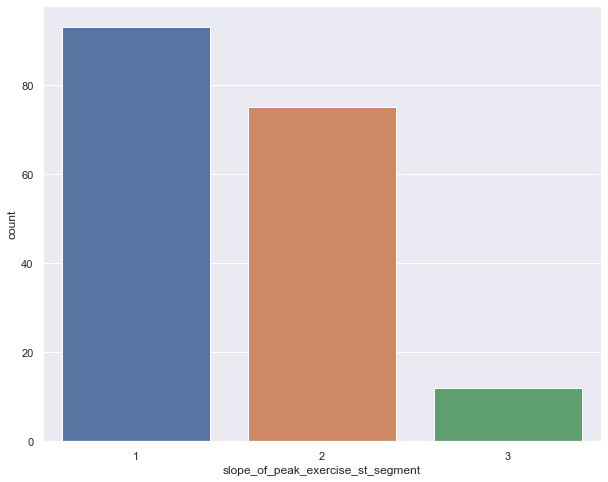

In [56]:
sns.countplot(x='slope_of_peak_exercise_st_segment', data=data_train)

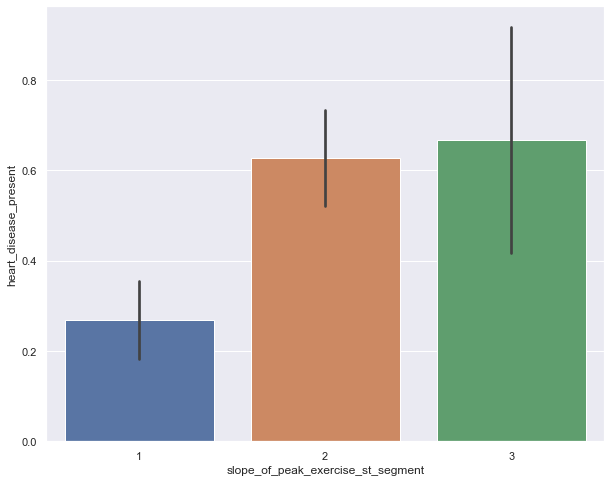

In [60]:
sns.barplot(x='slope_of_peak_exercise_st_segment', y='heart_disease_present', data=data_train)

In [58]:
data_train.columns

Index(['slope_of_peak_exercise_st_segment', 'thal', 'resting_blood_pressure',
       'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present'],
      dtype='object')